In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("earthquake_data.csv")
df

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,"M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...",7.7,13-01-2001 17:33,0,8,NaN,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660,"Puerto El Triunfo, El Salvador",NaN,NaN
778,"M 6.9 - 47 km S of Old Harbor, Alaska",6.9,10-01-2001 16:02,5,7,NaN,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281,"Old Harbor, Alaska",North America,NaN
779,"M 7.1 - 16 km NE of Port-Olry, Vanuatu",7.1,09-01-2001 16:49,0,7,NaN,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170,"Port-Olry, Vanuatu",NaN,Vanuatu
780,"M 6.8 - Mindanao, Philippines",6.8,01-01-2001 08:54,0,5,NaN,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899,"Mindanao, Philippines",NaN,NaN


### Preprocessing

In [4]:
df.isna().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        367
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       5
continent    576
country      298
dtype: int64

In [5]:
## Memeriksa dataset 
print(f'Number of records (rows) in the dataset are: {df.shape[0]}')
print(f'Number of features (columns) in the dataset are: {df.shape[1]}')
print(f'Number of duplicate entries in the dataset are: {df.duplicated().sum()}')
print(f'Number missing values in the dataset are: {sum(df.isna().sum())}')

Number of records (rows) in the dataset are: 782
Number of features (columns) in the dataset are: 19
Number of duplicate entries in the dataset are: 0
Number missing values in the dataset are: 1246


In [6]:
data = df[['latitude', 'longitude', 'magnitude', 'magType', 'depth', 'nst', 'gap', 'alert']]
data

,latitude,longitude,magnitude,magType,depth,nst,gap,alert
0,-9.7963,159.596,7.0,mww,14.000,117,17.0,green
1,-4.9559,100.738,6.9,mww,25.000,99,34.0,green
2,-20.0508,-178.346,7.0,mww,579.000,147,18.0,green
3,-19.2918,-172.129,7.3,mww,37.000,149,21.0,green
4,-25.5948,178.278,6.6,mww,624.464,131,27.0,green
...,...,...,...,...,...,...,...,...
777,13.0490,-88.660,7.7,mwc,60.000,427,0.0,NaN
778,56.7744,-153.281,6.9,mw,36.400,0,0.0,NaN
779,-14.9280,167.170,7.1,mwb,103.000,372,0.0,NaN
780,6.6310,126.899,6.8,mwc,33.000,64,0.0,NaN


In [7]:
dt= data.dropna()
dt

,latitude,longitude,magnitude,magType,depth,nst,gap,alert
0,-9.7963,159.596,7.0,mww,14.000,117,17.0,green
1,-4.9559,100.738,6.9,mww,25.000,99,34.0,green
2,-20.0508,-178.346,7.0,mww,579.000,147,18.0,green
3,-19.2918,-172.129,7.3,mww,37.000,149,21.0,green
4,-25.5948,178.278,6.6,mww,624.464,131,27.0,green
...,...,...,...,...,...,...,...,...
416,-28.0940,-70.653,6.8,mww,45.000,596,19.3,green
423,13.9880,-91.895,7.4,mww,24.000,751,25.5,yellow
440,0.8020,92.463,8.2,mwc,25.100,341,14.9,green
441,2.3270,93.063,8.6,mw,20.000,499,16.6,yellow


In [8]:
dt.isna().sum()

latitude     0
longitude    0
magnitude    0
magType      0
depth        0
nst          0
gap          0
alert        0
dtype: int64

In [9]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 507
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   415 non-null    float64
 1   longitude  415 non-null    float64
 2   magnitude  415 non-null    float64
 3   magType    415 non-null    object 
 4   depth      415 non-null    float64
 5   nst        415 non-null    int64  
 6   gap        415 non-null    float64
 7   alert      415 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 29.2+ KB


In [10]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding pada kolom 'magType'
dt['magType'] = label_encoder.fit_transform(dt['magType'])

# Melakukan label encoding pada kolom 'alert'
dt['alert'] = label_encoder.fit_transform(dt['alert'])

# dt = dt.astype(int)

# Memilih hanya kolom-kolom numerik
numeric_columns = dt.select_dtypes(include=[np.number])

# Deteksi outliers menggunakan Z-score pada kolom numerik
z_scores = stats.zscore(numeric_columns)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
print("Outliers berdasarkan Z-Score:")
dt[filtered_entries]

Outliers berdasarkan Z-Score:


C:\Users\Asus\AppData\Local\Temp\ipykernel_16536\237020220.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['magType'] = label_encoder.fit_transform(dt['magType'])
C:\Users\Asus\AppData\Local\Temp\ipykernel_16536\237020220.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['alert'] = label_encoder.fit_transform(dt['alert'])


,latitude,longitude,magnitude,magType,depth,nst,gap,alert
0,-9.7963,159.5960,7.0,4,14.0,117,17.0,0
1,-4.9559,100.7380,6.9,4,25.0,99,34.0,0
2,-20.0508,-178.3460,7.0,4,579.0,147,18.0,0
3,-19.2918,-172.1290,7.3,4,37.0,149,21.0,0
7,7.6712,-82.3396,6.7,4,20.0,145,37.0,0
...,...,...,...,...,...,...,...,...
409,-10.9280,166.0180,7.1,4,21.0,334,16.5,0
410,-10.8380,165.9690,6.8,4,12.0,400,17.5,0
411,-10.9970,165.6550,6.7,4,11.0,387,26.5,0
412,-10.4990,165.5880,7.0,4,8.8,445,17.5,0


In [11]:
#deteksi outlier
def persentase_outlier(df):
    for kolom in df.columns:
        q1 = df[kolom].quantile(0.25)
        q3 = df[kolom].quantile(0.75)
        rentang_interkuartil = q3 - q1

        batas_atas = q3 + (rentang_interkuartil * 1.5)
        batas_bawah = q1 - (rentang_interkuartil * 1.5)

        persentase = (((len(df[df[kolom] > batas_atas])) +
                      (len(df[df[kolom] < batas_bawah]))) / len(df[kolom])) * 100

        print(f"{kolom} : {persentase:.2f} %")

In [12]:
#presentase outlier
persentase_outlier(dt)

latitude : 0.00 %
longitude : 0.00 %
magnitude : 4.34 %
magType : 3.61 %
depth : 13.98 %
nst : 14.70 %
gap : 6.51 %
alert : 21.69 %


In [13]:
def ganti_outlier_batas_ekstrim(st, kolom):
    q1 = st[kolom].quantile(0.25)
    q3 = st[kolom].quantile(0.75)
    rentang_interkuartil = q3 - q1

    batas_atas = q3 + (rentang_interkuartil * 1.5)
    batas_bawah = q1 - (rentang_interkuartil * 1.5)

    st[kolom].mask(st[kolom] > batas_atas, batas_atas, inplace=True)
    st[kolom].mask(st[kolom] < batas_bawah, batas_bawah, inplace=True)

<AxesSubplot: xlabel='magnitude'>

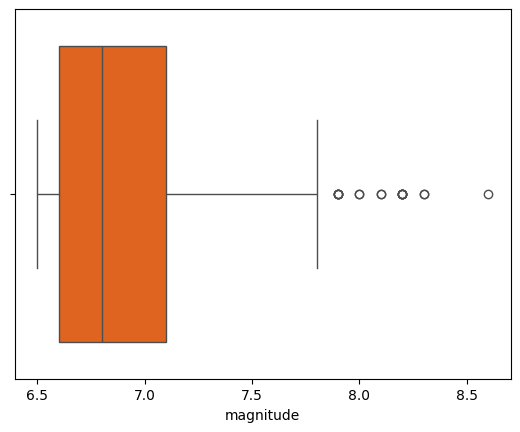

In [14]:
#replace outlier pada kolom pregnancies
sns.boxplot(dt['magnitude'], orient = 'h', color = '#FF5B00')

In [15]:
ganti_outlier_batas_ekstrim(dt,'magnitude')

C:\Users\Asus\AppData\Local\Temp\ipykernel_16536\989073807.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st[kolom].mask(st[kolom] > batas_atas, batas_atas, inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_16536\989073807.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st[kolom].mask(st[kolom] < batas_bawah, batas_bawah, inplace=True)


<AxesSubplot: xlabel='magnitude'>

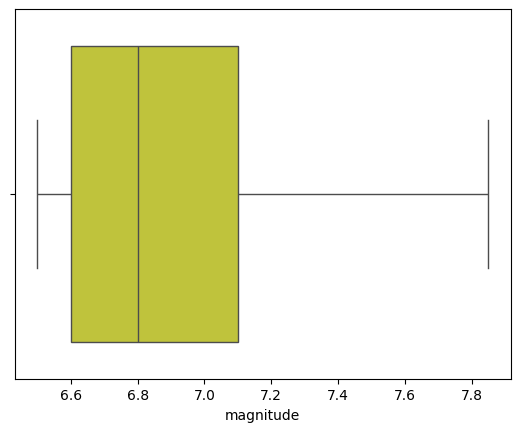

In [16]:
sns.boxplot(dt['magnitude'], orient = 'h', color = '#D4D925')

<AxesSubplot: xlabel='depth'>

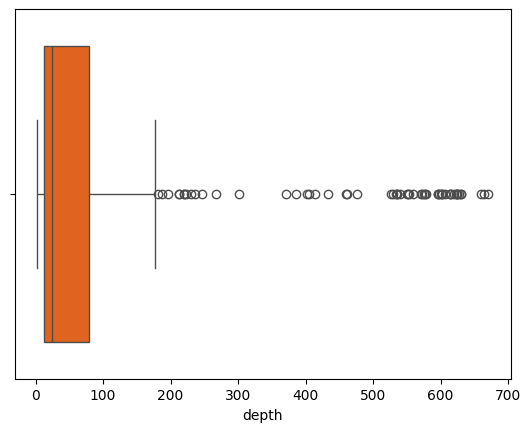

In [17]:
#replace outlier pada kolom pregnancies
sns.boxplot(dt['depth'], orient = 'h', color = '#FF5B00')

In [18]:
ganti_outlier_batas_ekstrim(dt,'depth')

C:\Users\Asus\AppData\Local\Temp\ipykernel_16536\989073807.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st[kolom].mask(st[kolom] > batas_atas, batas_atas, inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_16536\989073807.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st[kolom].mask(st[kolom] < batas_bawah, batas_bawah, inplace=True)


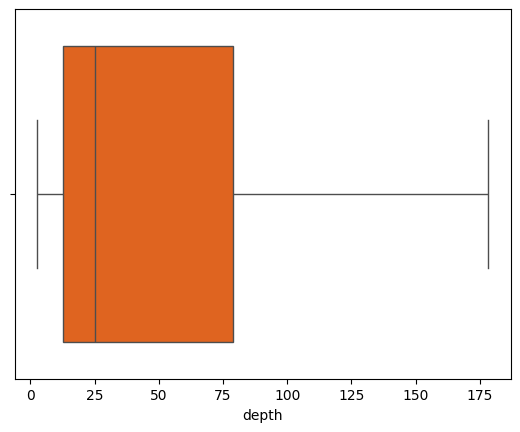

In [19]:
#replace outlier pada kolom pregnancies
sns.boxplot(dt['depth'], orient = 'h', color = '#FF5B00');

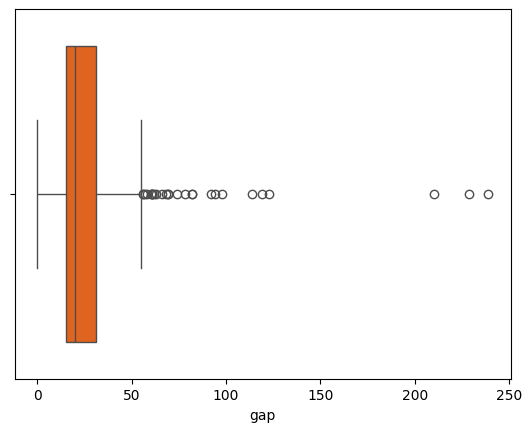

In [20]:
#replace outlier pada kolom pregnancies
sns.boxplot(dt['gap'], orient = 'h', color = '#FF5B00');

In [21]:
ganti_outlier_batas_ekstrim(dt,'gap')

C:\Users\Asus\AppData\Local\Temp\ipykernel_16536\989073807.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st[kolom].mask(st[kolom] > batas_atas, batas_atas, inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_16536\989073807.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st[kolom].mask(st[kolom] < batas_bawah, batas_bawah, inplace=True)


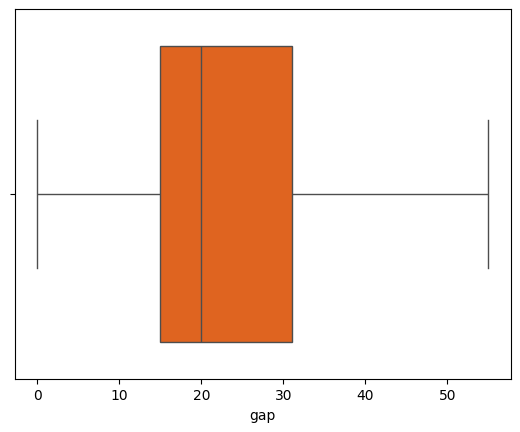

In [22]:
#replace outlier pada kolom pregnancies
sns.boxplot(dt['gap'], orient = 'h', color = '#FF5B00');

#### Standarisasi

In [28]:
from sklearn.preprocessing import StandardScaler

#split dataset menjadi variabel x dan y
x = dt.iloc[:,:-1]
y = dt['alert']

#normalisasi data dengan standartscaler menjadi skala 0-1
sc = StandardScaler()
x_scaled  = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [29]:
x_scaled

,latitude,longitude,magnitude,magType,depth,nst,gap
0,-0.374921,0.973224,0.263032,0.181898,-0.693701,0.510171,-0.550910
1,-0.207412,0.505608,0.004363,0.181898,-0.510907,0.379569,0.734449
2,-0.729790,-1.711663,0.263032,0.181898,2.036698,0.727842,-0.475300
3,-0.703524,-1.662270,1.039040,0.181898,-0.311496,0.742353,-0.248472
4,-0.921647,1.121649,-0.771645,0.181898,2.036698,0.611751,0.205184
...,...,...,...,...,...,...,...
410,-1.008135,-0.856062,-0.254306,0.181898,-0.178555,3.985646,-0.377008
411,0.448165,-1.024826,1.297709,0.181898,-0.527525,5.110278,0.091770
412,-0.008153,0.439865,2.461721,-1.858307,-0.509245,2.135446,-0.709689
413,0.044621,0.444632,2.461721,-5.938718,-0.593995,3.281845,-0.581154


0    325
3     56
1     22
2     12
Name: alert, dtype: int64


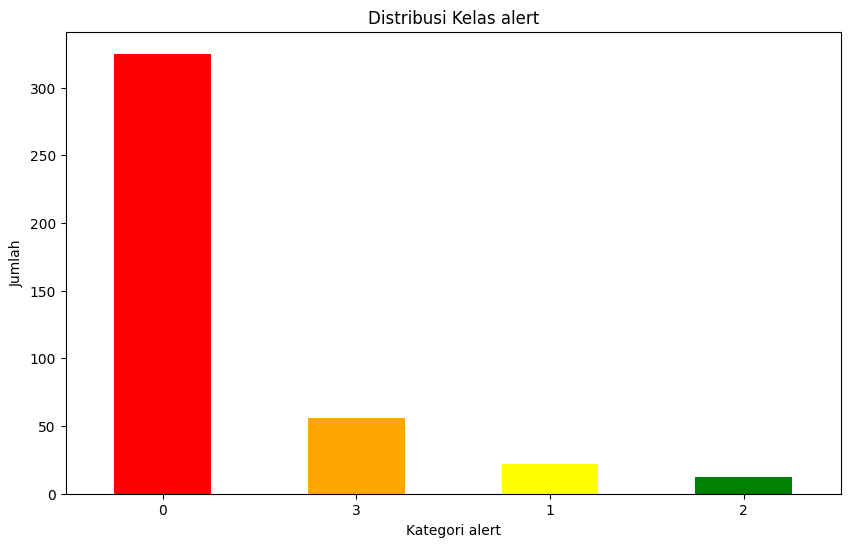

In [30]:
# Melihat distribusi setiap kelas 
alert_distribution = y.value_counts()
print(alert_distribution)

# Visualisasi distribusi kelas
plt.figure(figsize=(10, 6))
alert_distribution.plot(kind='bar', color=['green', 'red', 'yellow', 'orange'])
plt.title('Distribusi Kelas alert')
plt.xlabel('Kategori alert')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

#### Split Data 

In [31]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi training dan testing set
x_train, x_test, ytrain, ytest = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

### Random Forest 

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi model
model = RandomForestClassifier(random_state=42)

# Latih model dengan data training
model.fit(x_train, ytrain)

# Prediksi dengan data testing
ypred = model.predict(x_test)

In [36]:
# Evaluasi kinerja model
print("Accuracy:", accuracy_score(ytest, ypred))
print("Classification Report:")
print(classification_report(ytest, ypred))

Accuracy: 0.7951807228915663
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89        64
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         2
           3       0.60      0.25      0.35        12

    accuracy                           0.80        83
   macro avg       0.35      0.31      0.31        83
weighted avg       0.72      0.80      0.74        83



c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

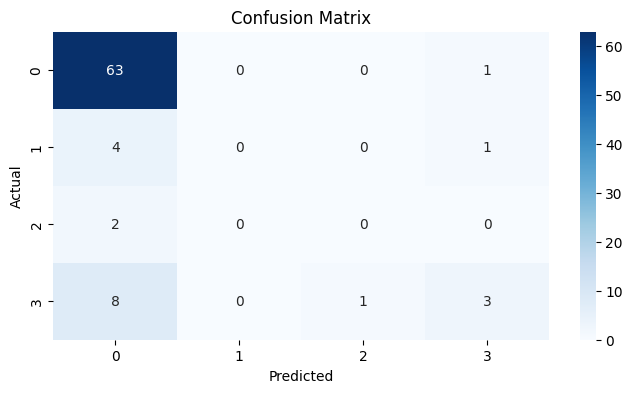

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
cm = confusion_matrix(ytest, ypred)

# Buat visualisasi confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi model regresi logistik
model2 = LogisticRegression(max_iter=100, random_state=42)

# Latih model dengan data training
model2.fit(x_train, ytrain)

# Prediksi dengan data testing
y_pred2 = model2.predict(x_test)

In [41]:
# Evaluasi model
accuracy2 = accuracy_score(ytest, y_pred2)
classification_report2 = classification_report(ytest, y_pred2)

# Cetak hasil evaluasi
print("Model: Logistic Regression")
print(f"Accuracy: {accuracy2}")
print("Classification Report:")
print(classification_report2)

Model: Logistic Regression
Accuracy: 0.7710843373493976
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88        64
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         2
           3       0.50      0.08      0.14        12

    accuracy                           0.77        83
   macro avg       0.32      0.27      0.26        83
weighted avg       0.69      0.77      0.70        83



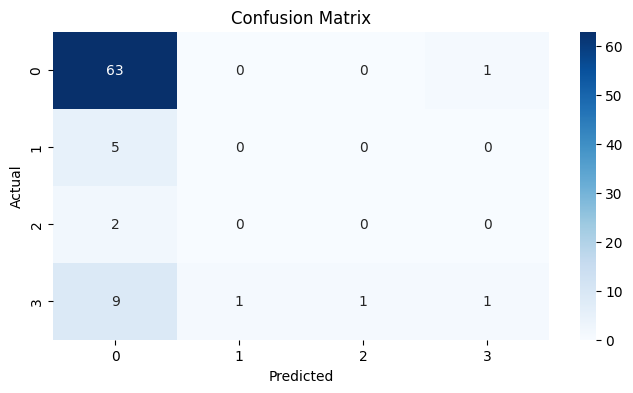

In [43]:
# Hitung confusion matrix
cm2 = confusion_matrix(ytest, y_pred2)

# Buat visualisasi confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi model Decision Tree
model3 = DecisionTreeClassifier(random_state=42)

# Latih model dengan data training
model3.fit(x_train, ytrain)

# Prediksi dengan data testing
y_pred3 = model3.predict(x_test)

In [45]:
# Evaluasi model
accuracy3 = accuracy_score(ytest, y_pred3)
classification_report3 = classification_report(ytest, y_pred3)
confusion_matrix3 = confusion_matrix(ytest, y_pred3)

# Cetak hasil evaluasi
print("Model: Decision Tree")
print(f"Accuracy: {accuracy3}")
print("Classification Report:")
print(classification_report3)

Model: Decision Tree
Accuracy: 0.7228915662650602
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        64
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         2
           3       0.33      0.25      0.29        12

    accuracy                           0.72        83
   macro avg       0.30      0.29      0.29        83
weighted avg       0.70      0.72      0.71        83



c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

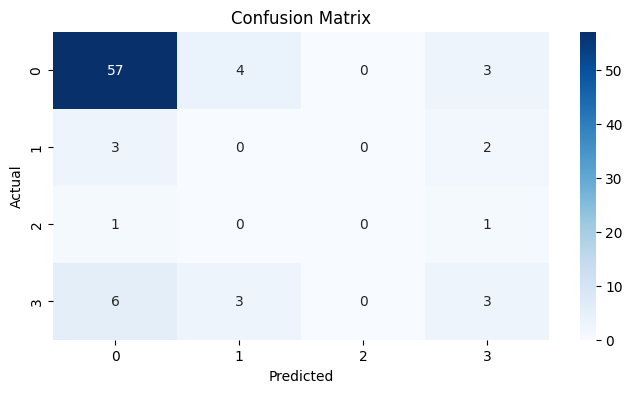

In [46]:
# Hitung confusion matrix
cm3 = confusion_matrix(ytest, y_pred3)

# Buat visualisasi confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### SVM

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi model SVM
model4 = SVC(random_state=42)

# Latih model dengan data training
model4.fit(x_train, ytrain)

# Prediksi dengan data testing
y_pred4 = model4.predict(x_test)

In [48]:
# Evaluasi model
accuracy4 = accuracy_score(ytest, y_pred4)
classification_report4 = classification_report(ytest, y_pred4)
confusion_matrix4 = confusion_matrix(ytest, y_pred4)

# Cetak hasil evaluasi
print("Model: Support Vector Machine")
print(f"Accuracy: {accuracy4}")
print("Classification Report:")
print(classification_report4)

Model: Support Vector Machine
Accuracy: 0.7710843373493976
Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        64
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        12

    accuracy                           0.77        83
   macro avg       0.19      0.25      0.22        83
weighted avg       0.59      0.77      0.67        83



c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

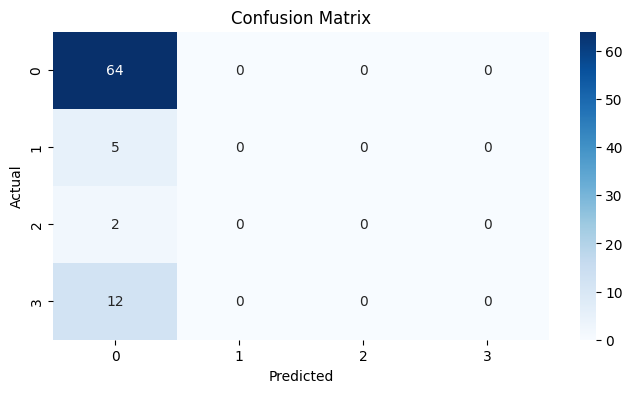

In [49]:
# Hitung confusion matrix
cm4 = confusion_matrix(ytest, y_pred4)

# Buat visualisasi confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi model K-Nearest Neighbors
model5 = KNeighborsClassifier()

# Latih model dengan data training
model5.fit(x_train, ytrain)

# Prediksi dengan data testing
y_pred5 = model5.predict(x_test)

In [53]:
# Evaluasi model
accuracy5 = accuracy_score(ytest, y_pred5)
classification_report5 = classification_report(ytest, y_pred5)
confusion_matrix5 = confusion_matrix(ytest, y_pred5)

# Cetak hasil evaluasi
print("Model: K-Nearest Neighbors")
print(f"Accuracy: {accuracy5}")
print("Classification Report:")
print(classification_report5)

Model: K-Nearest Neighbors
Accuracy: 0.7831325301204819
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        64
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         2
           3       0.60      0.25      0.35        12

    accuracy                           0.78        83
   macro avg       0.35      0.30      0.31        83
weighted avg       0.71      0.78      0.73        83



c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

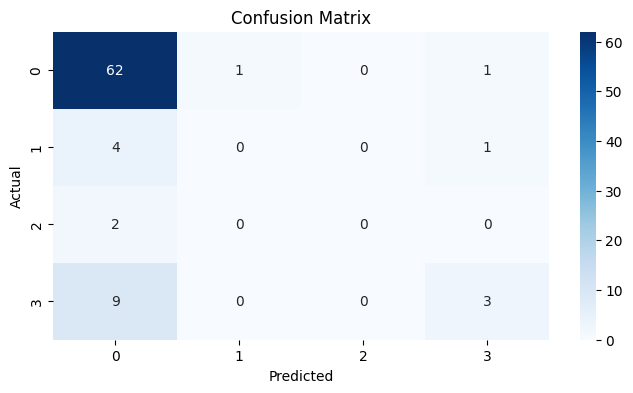

In [54]:
# Hitung confusion matrix
cm5 = confusion_matrix(ytest, y_pred5)

# Buat visualisasi confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(cm5, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()